In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno

In [16]:
df  = pd.read_csv("imdb_top_1000.csv")
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [17]:
"""
Poster_Link - Link of the poster that imdb using
Series_Title = Name of the movie
Released_Year - Year at which that movie released
Certificate - Certificate earned by that movie
Runtime - Total runtime of the movie
Genre - Genre of the movie
IMDB_Rating - Rating of the movie at IMDB site
Overview - mini story/ summary
Meta_score - Score earned by the movie
Director - Name of the Director
Star1,Star2,Star3,Star4 - Name of the Stars
No_of_votes - Total number of votes
Gross - Money earned by that movie
"""

'\nPoster_Link - Link of the poster that imdb using\nSeries_Title = Name of the movie\nReleased_Year - Year at which that movie released\nCertificate - Certificate earned by that movie\nRuntime - Total runtime of the movie\nGenre - Genre of the movie\nIMDB_Rating - Rating of the movie at IMDB site\nOverview - mini story/ summary\nMeta_score - Score earned by the movie\nDirector - Name of the Director\nStar1,Star2,Star3,Star4 - Name of the Stars\nNo_of_votes - Total number of votes\nGross - Money earned by that movie\n'

In [19]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [21]:
df["Gross"] = df["Gross"].apply(lambda x: str(x).replace(",","")).astype(float)

In [22]:
df["Released_Year"] = df["Released_Year"].apply(lambda x: float(x) if x.isdigit() else np.nan)

In [23]:
df["Runtime"] = df["Runtime"].apply(lambda x: x.replace(" min","")).astype(int)

In [24]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [26]:
{x:df[x].duplicated().sum() for x in df}

{'Poster_Link': np.int64(0),
 'Series_Title': np.int64(1),
 'Released_Year': np.int64(900),
 'Certificate': np.int64(983),
 'Runtime': np.int64(860),
 'Genre': np.int64(798),
 'IMDB_Rating': np.int64(983),
 'Overview': np.int64(0),
 'Meta_score': np.int64(936),
 'Director': np.int64(452),
 'Star1': np.int64(340),
 'Star2': np.int64(159),
 'Star3': np.int64(109),
 'Star4': np.int64(61),
 'No_of_Votes': np.int64(1),
 'Gross': np.int64(176)}

In [27]:
df["Series_Title"][df["Series_Title"].duplicated()]

136    Drishyam
Name: Series_Title, dtype: object

In [28]:
"""
1) missing no
2) numeric column distributions
3) gross realated column relationships
"""

'\n1) missing no\n2) numeric column distributions\n3) gross realated column relationships\n'

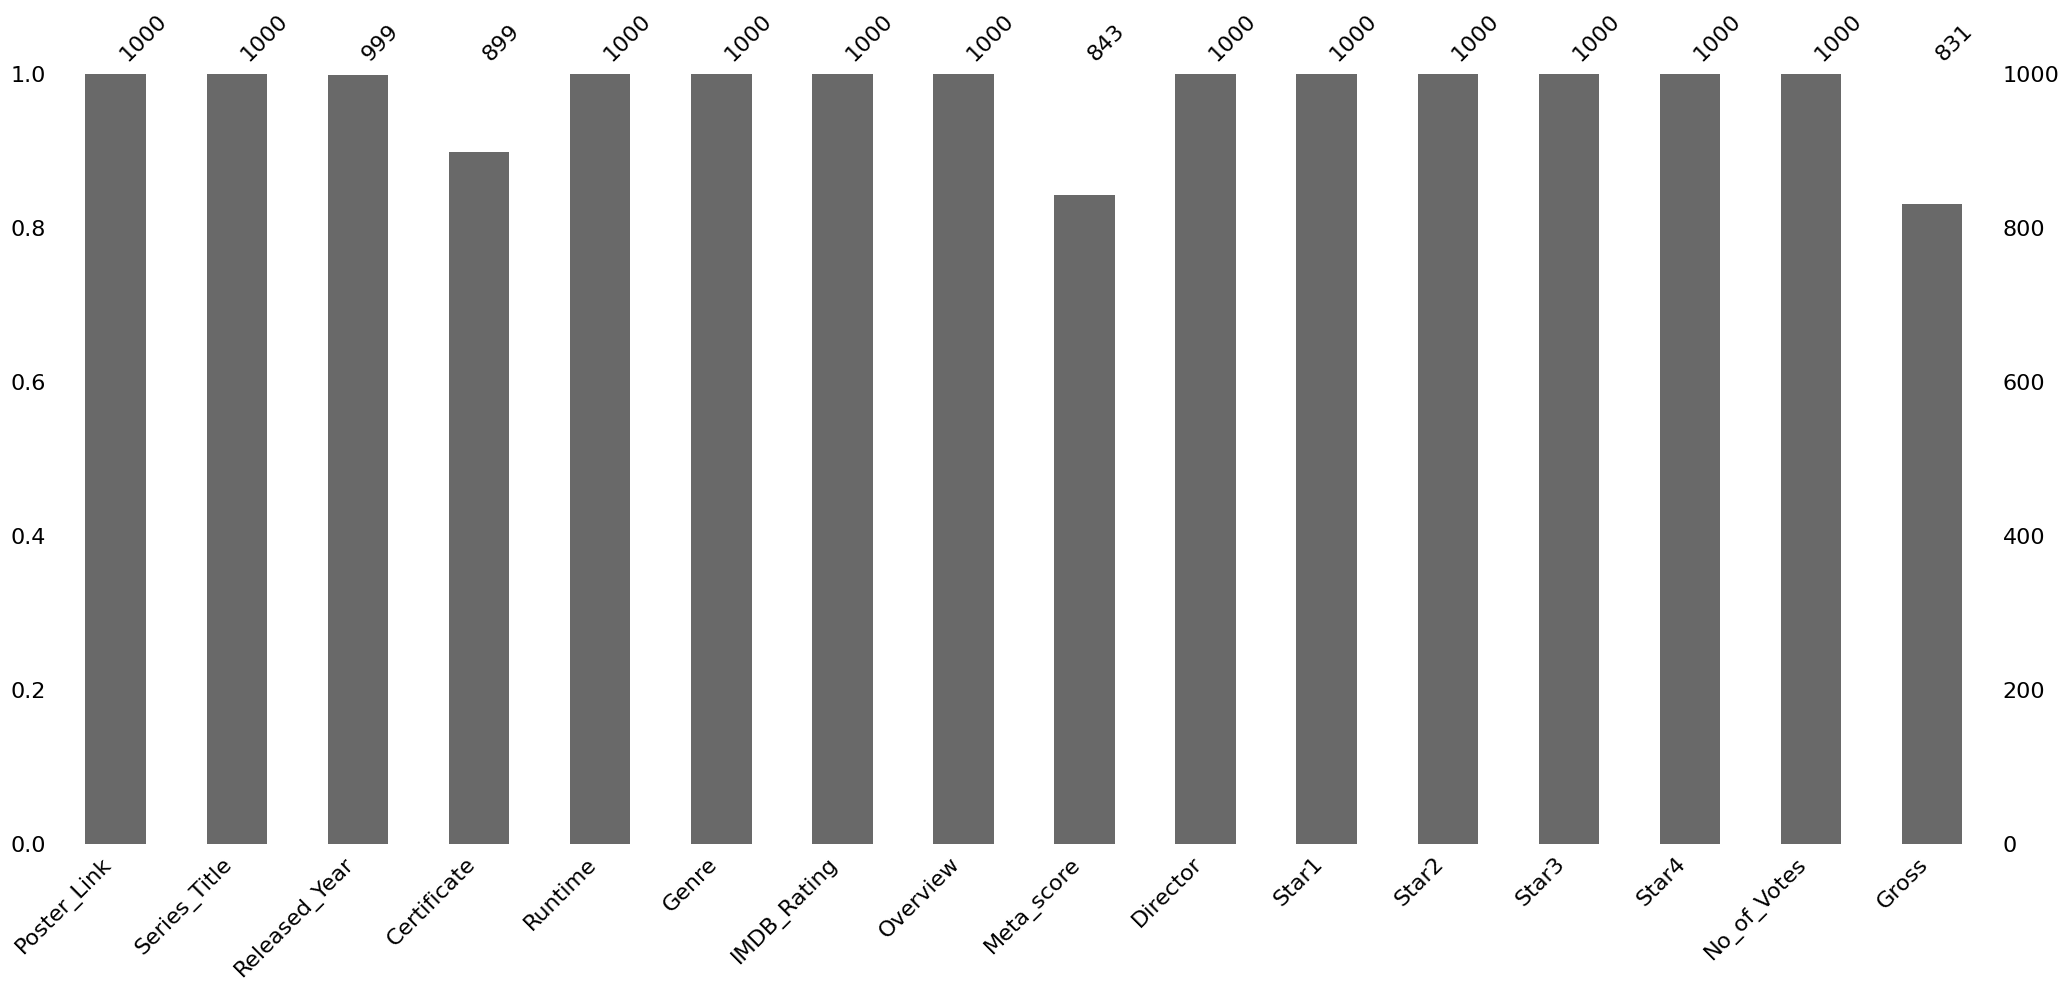

In [29]:
missingno.bar(df)
plt.show()

<Axes: >

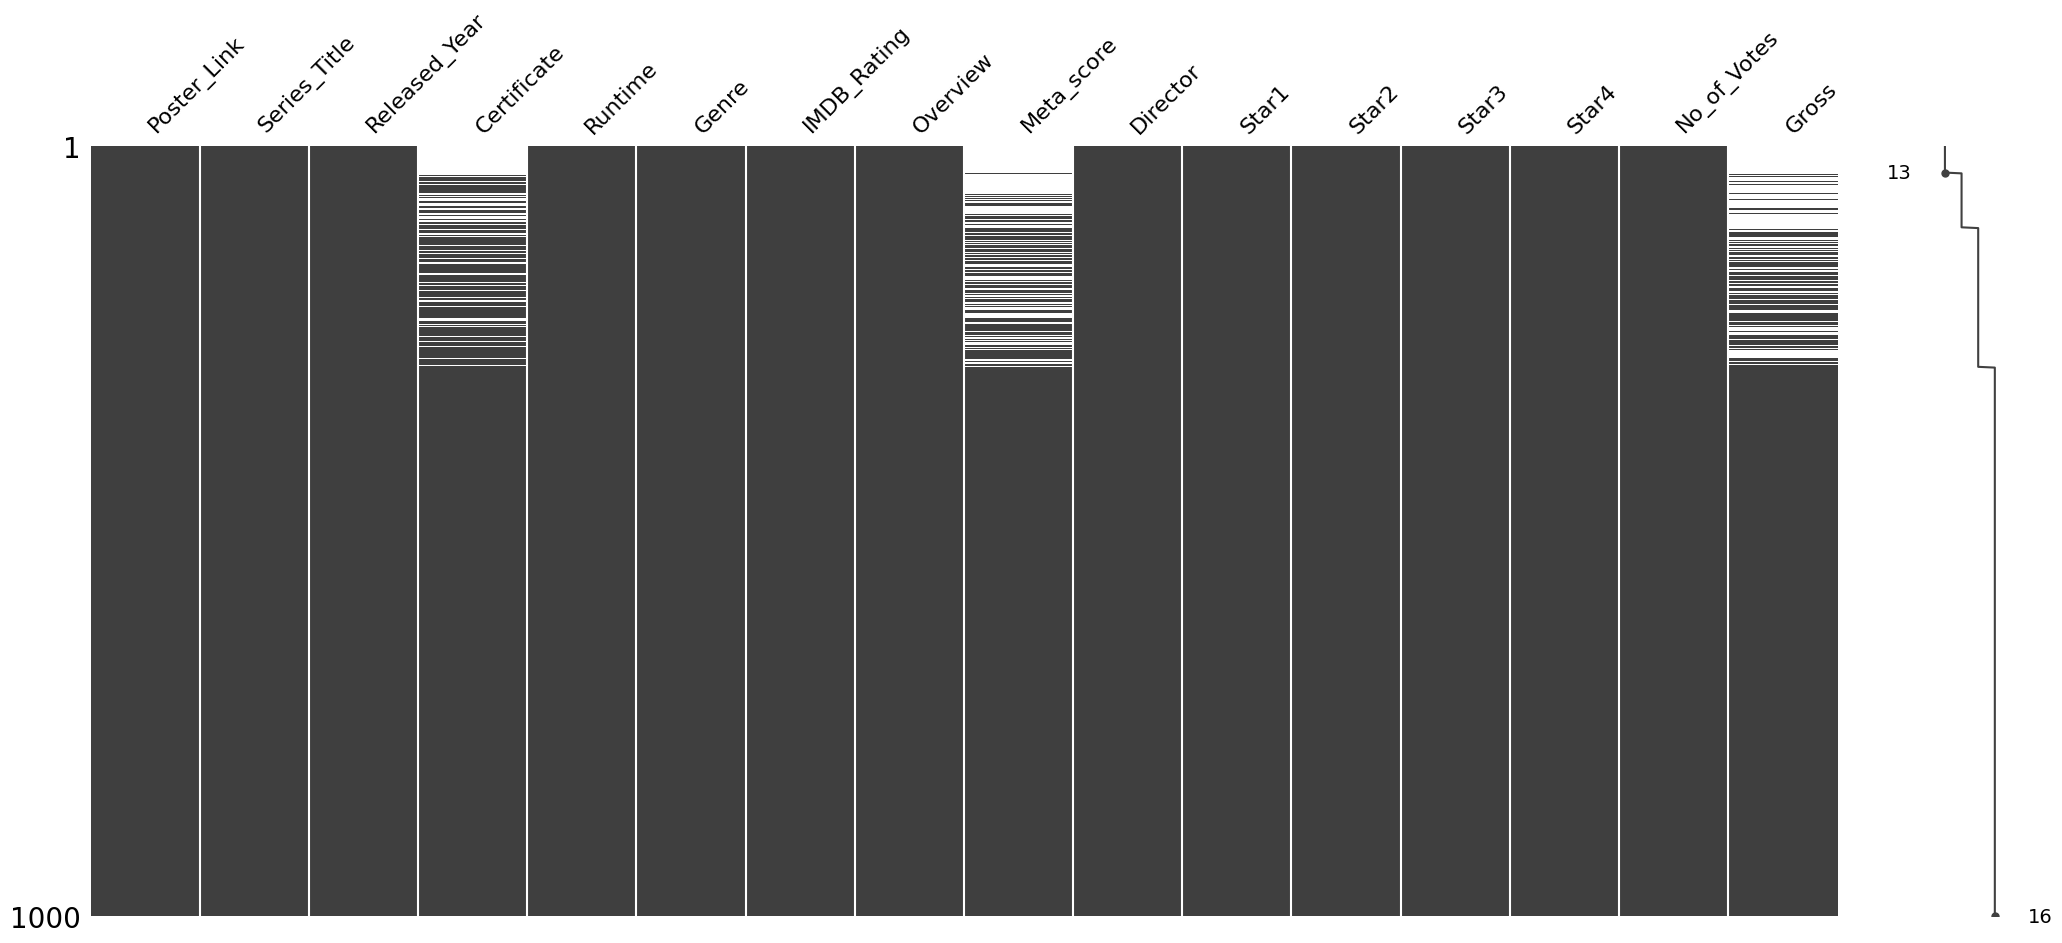

In [31]:
missingno.matrix(df, sort='ascending')

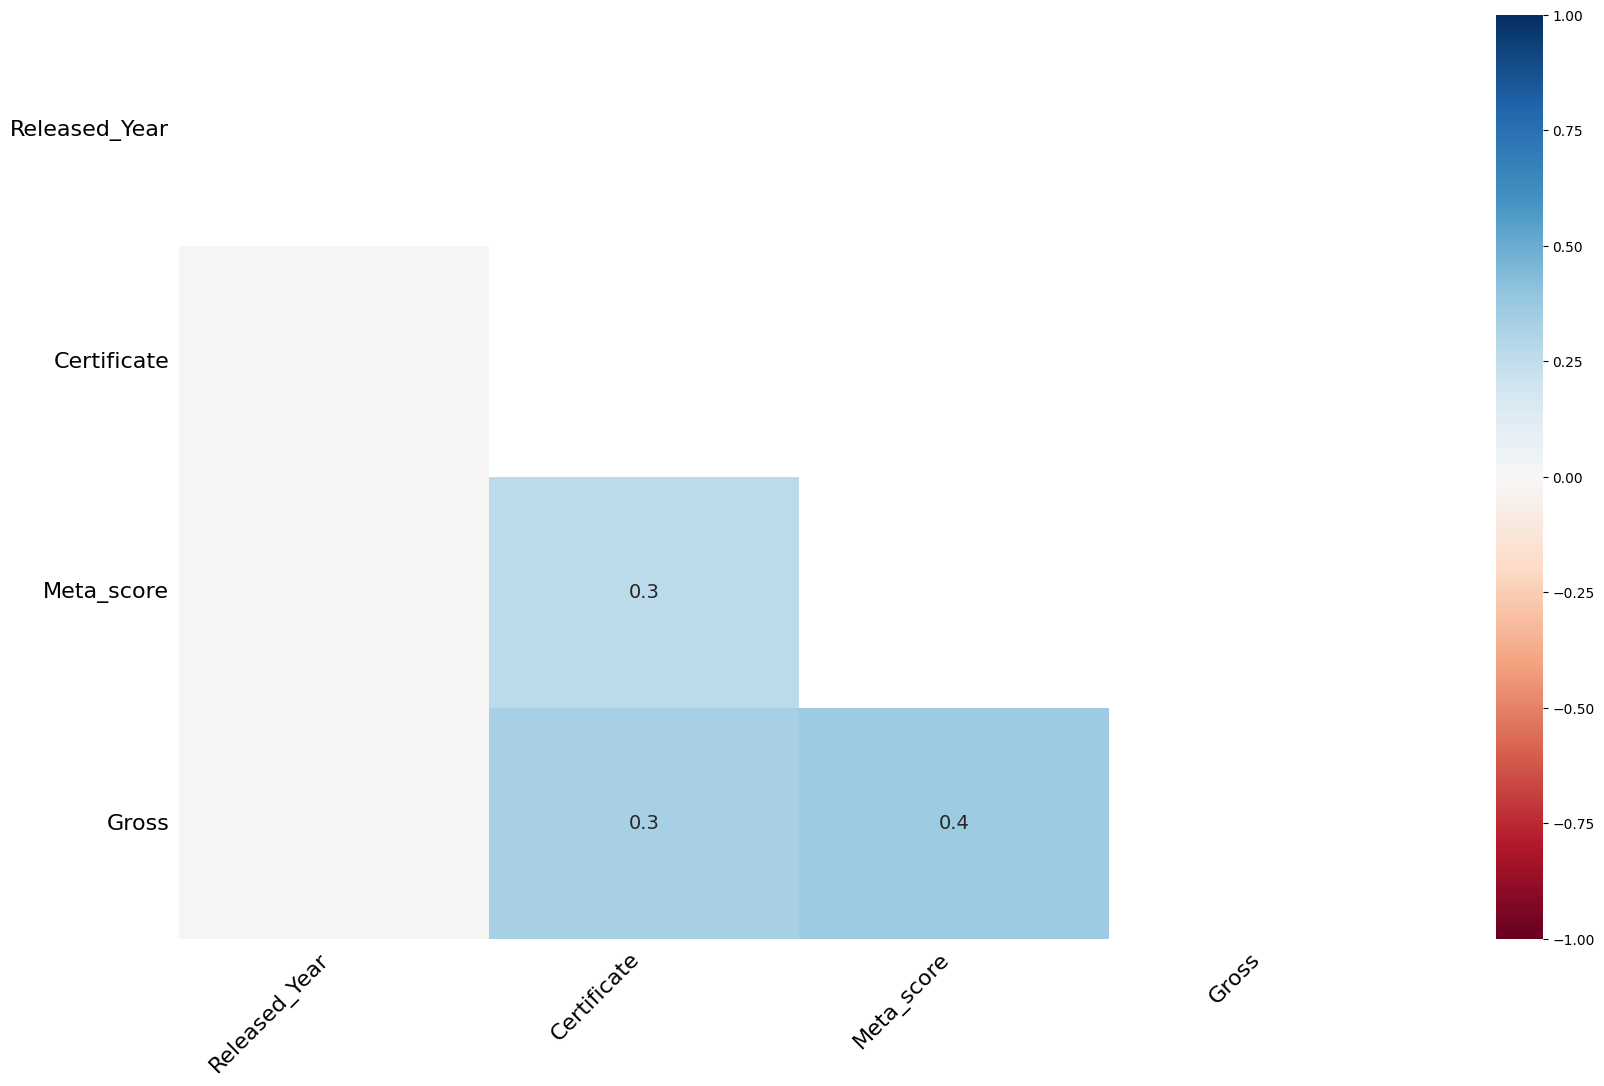

In [32]:
missingno.heatmap(df)
plt.show()

<Axes: >

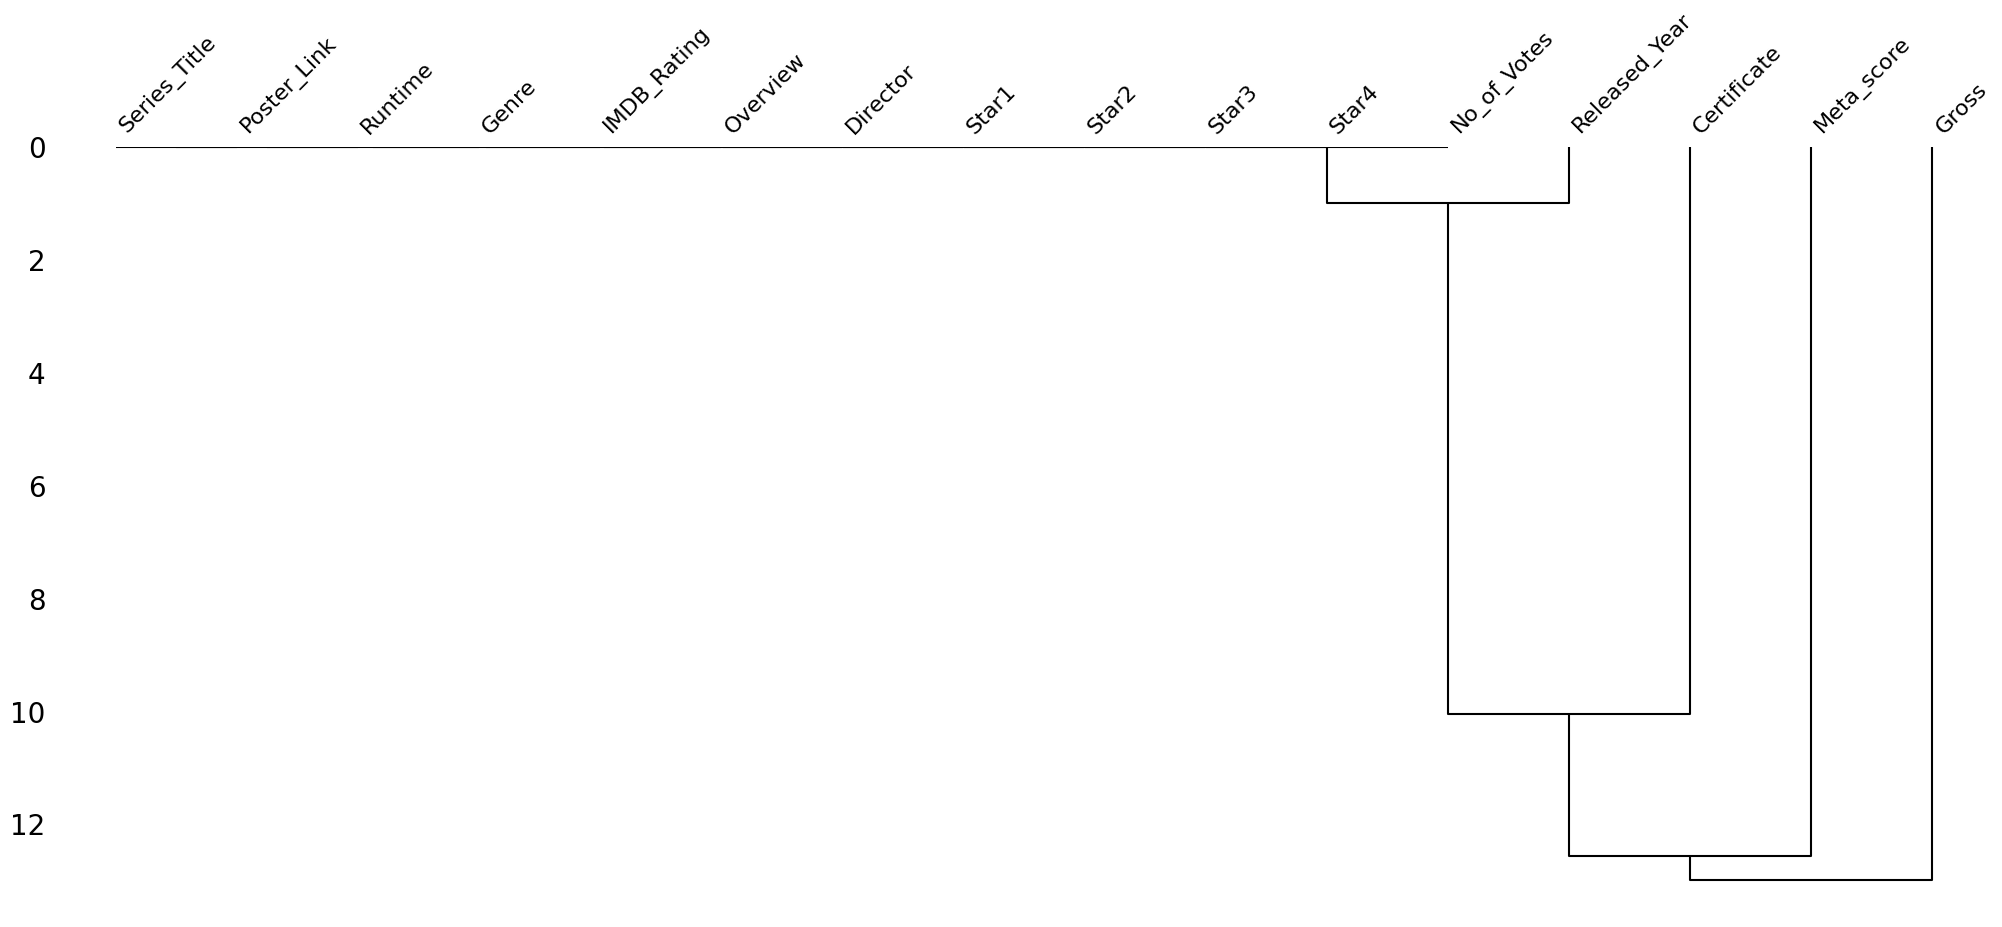

In [33]:
missingno.dendrogram(df)


In [34]:
num_cols = df.dtypes[df.dtypes!="O"].index.tolist()

In [35]:
num_cols

['Released_Year',
 'Runtime',
 'IMDB_Rating',
 'Meta_score',
 'No_of_Votes',
 'Gross']

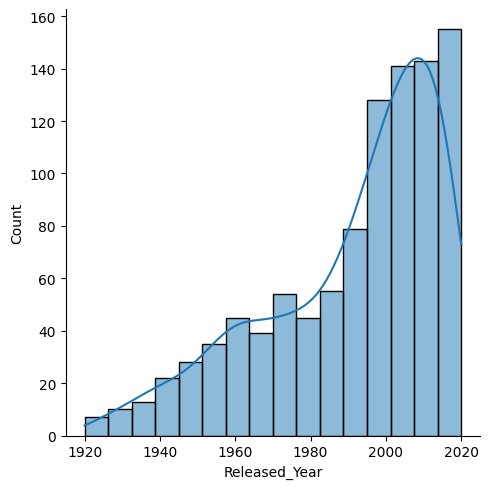

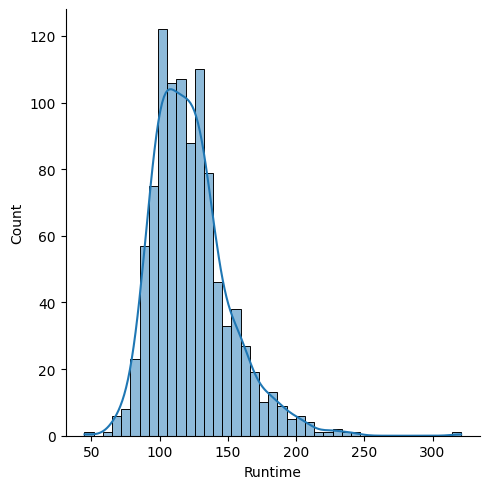

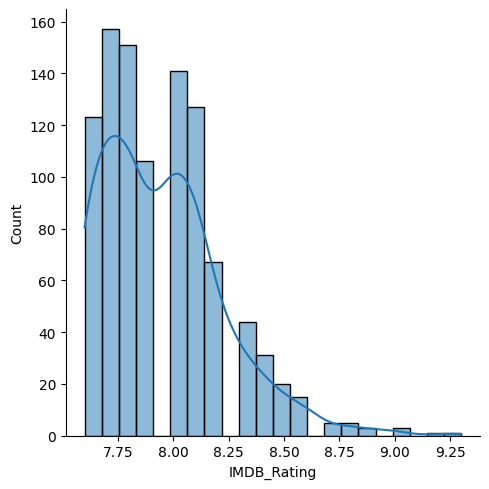

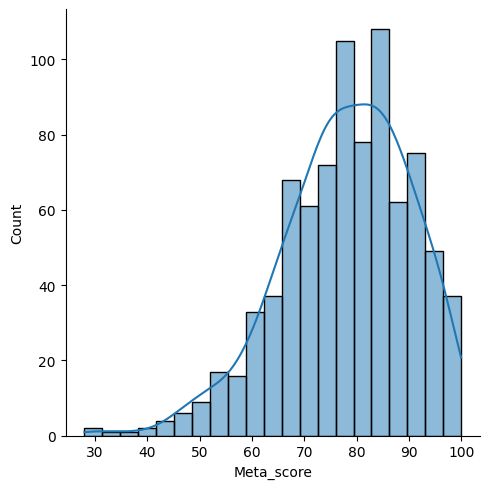

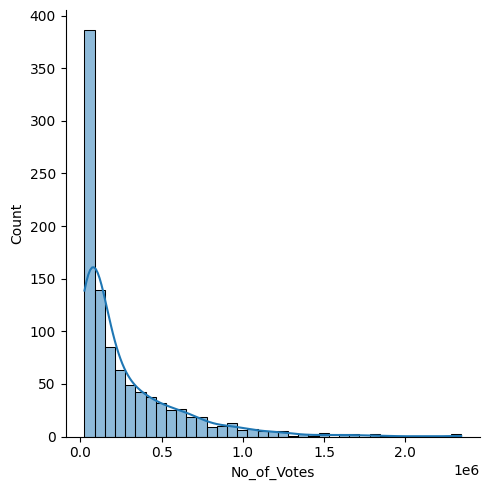

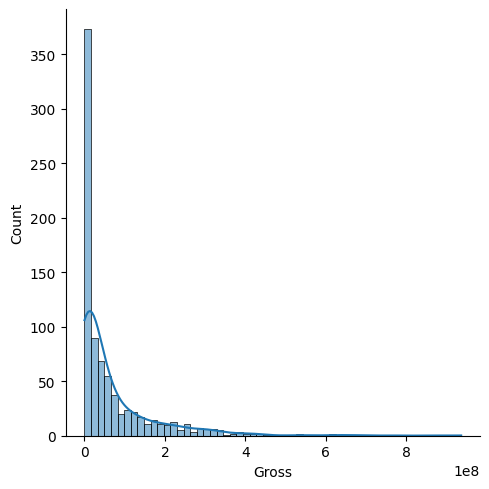

In [36]:
for num_col in num_cols:
    sns.displot(df[num_col], kde=True)
    plt.show()

In [37]:
df["Released_Year"].max()

np.float64(2020.0)

In [38]:
df_sorted = df.sort_values("Gross", ascending=False)

In [40]:
"""godfather
titanic
star wars"""

'godfather\ntitanic\nstar wars'

<BarContainer object of 5 artists>

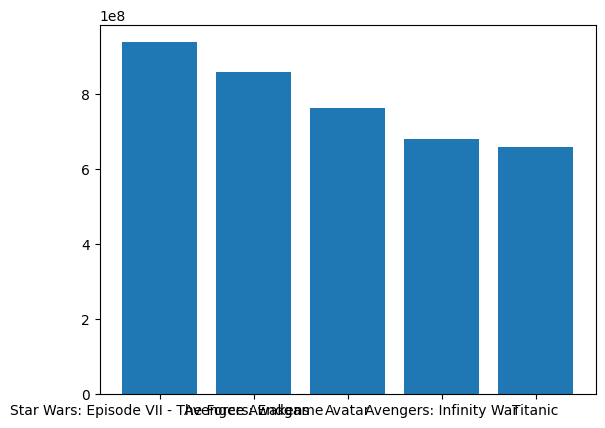

In [42]:
plt.bar(df_sorted["Series_Title"].head(), df_sorted["Gross"].head())

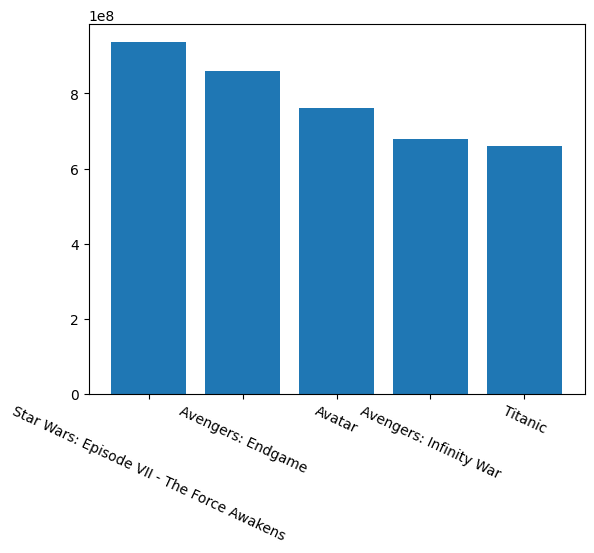

In [43]:
plt.bar(df_sorted["Series_Title"].head(), df_sorted["Gross"].head())
plt.xticks(rotation = -25);

In [44]:
df_sorted2=df_sorted.dropna(subset=["Gross"])

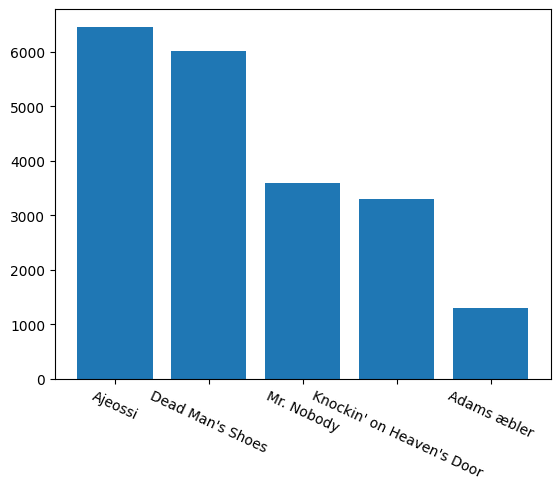

In [45]:
plt.bar(df_sorted2["Series_Title"].tail(), df_sorted2["Gross"].tail())
plt.xticks(rotation = -25);

In [47]:
df_sorted["Series_Title"].tail()

993                    Blowup
995    Breakfast at Tiffany's
996                     Giant
998                  Lifeboat
999              The 39 Steps
Name: Series_Title, dtype: object

In [48]:
df_sorted["Gross"].tail()

993   NaN
995   NaN
996   NaN
998   NaN
999   NaN
Name: Gross, dtype: float64

<BarContainer object of 5 artists>

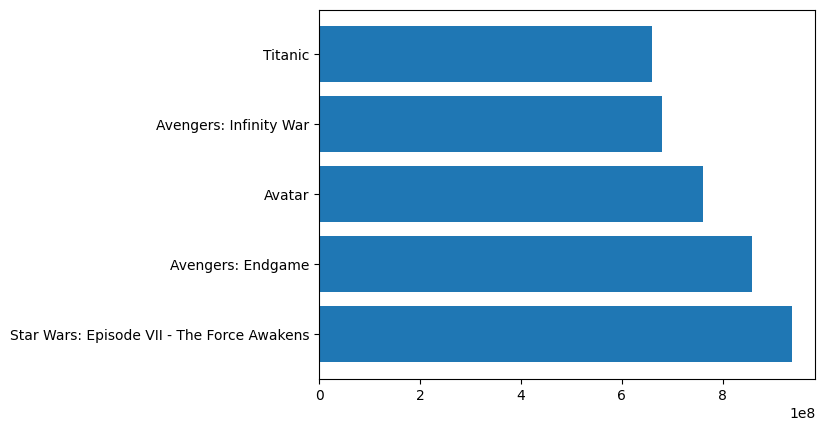

In [49]:
plt.barh(df_sorted["Series_Title"].head(), df_sorted["Gross"].head())

## average top directors

In [50]:
top_directors = df['Director'].value_counts().head(20).index.tolist()

In [51]:
top_directors

['Alfred Hitchcock',
 'Steven Spielberg',
 'Hayao Miyazaki',
 'Martin Scorsese',
 'Akira Kurosawa',
 'Stanley Kubrick',
 'Billy Wilder',
 'Woody Allen',
 'Christopher Nolan',
 'Quentin Tarantino',
 'David Fincher',
 'Clint Eastwood',
 'Rob Reiner',
 'Howard Hawks',
 'Ingmar Bergman',
 'Ridley Scott',
 'Alfonso Cuarón',
 'Charles Chaplin',
 'Richard Linklater',
 'Sergio Leone']

In [52]:
rating_by_director = df.groupby(by = 'Director')['IMDB_Rating'].mean()[top_directors]

In [53]:
rating_by_director

Director
Alfred Hitchcock     8.007143
Steven Spielberg     8.030769
Hayao Miyazaki       8.018182
Martin Scorsese      8.170000
Akira Kurosawa       8.220000
Stanley Kubrick      8.233333
Billy Wilder         8.144444
Woody Allen          7.788889
Christopher Nolan    8.462500
Quentin Tarantino    8.175000
David Fincher        8.037500
Clint Eastwood       7.912500
Rob Reiner           7.828571
Howard Hawks         7.857143
Ingmar Bergman       8.142857
Ridley Scott         8.083333
Alfonso Cuarón       7.750000
Charles Chaplin      8.333333
Richard Linklater    7.900000
Sergio Leone         8.266667
Name: IMDB_Rating, dtype: float64

In [54]:
rating_by_director = rating_by_director.sort_values(ascending=True)

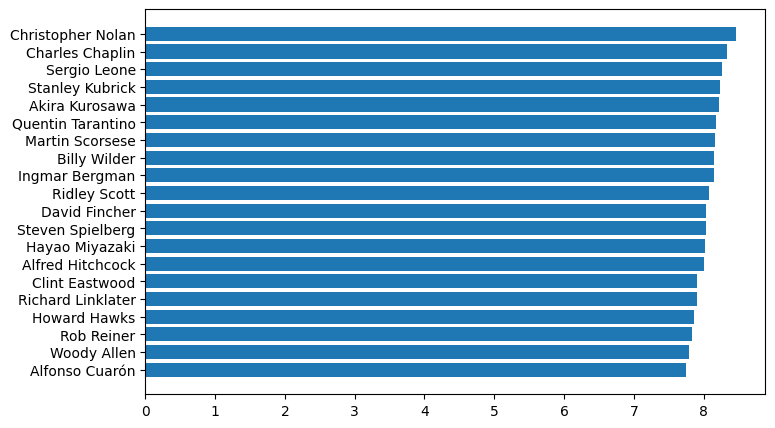

In [55]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.barh(rating_by_director.index, rating_by_director.values)

# plt.yticks(rotation=90)

plt.show()

In [ ]:
rating_by_director_meta = df.groupby(by = 'Director')['Meta_score'].mean()[top_directors]

In [ ]:
rating_by_director_meta = rating_by_director_meta.sort_values(ascending=True)

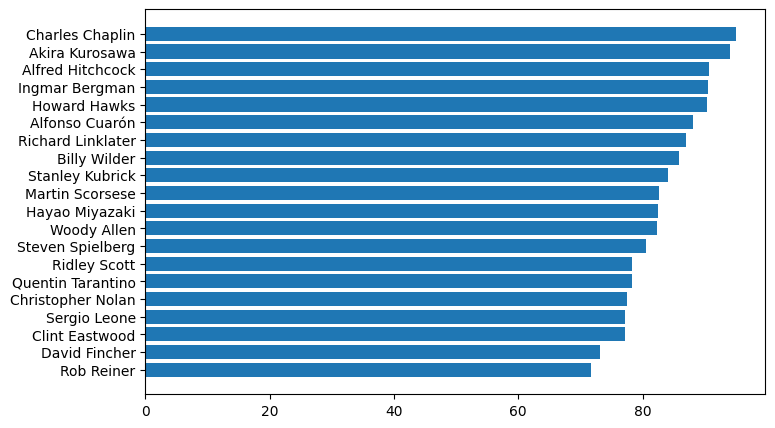

In [ ]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

ax.barh(y=rating_by_director_meta.index, width=rating_by_director_meta.values)

# plt.yticks(rotation=90)

plt.show()

In [56]:
favorite_actor = 'Tom Hanks'

# find all movies that favorite_actor plays in and rank top 10 based on gross

In [57]:
star_cols = ['Star1', 'Star2', 'Star3', 'Star4']

In [58]:
present = np.zeros(df.shape[0])
for col in star_cols:
  present += (df[col].apply(lambda x: favorite_actor in x).values * 1)


In [59]:
present

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
df_hanks = df[present == 1]

In [62]:
df_hanks=df_hanks.sort_values(by = 'Gross', ascending=True)[['Series_Title',"Gross"]]
df_hanks

,Series_Title,Gross
890,Bridge of Spies,72313754.0
818,Philadelphia,77324422.0
791,Road to Perdition,104454762.0
604,Captain Phillips,107100855.0
25,The Green Mile,136801374.0
243,Catch Me If You Can,164615351.0
966,Apollo 13,173837933.0
101,Toy Story,191796233.0
24,Saving Private Ryan,216540909.0
647,Cast Away,233632142.0


<BarContainer object of 10 artists>

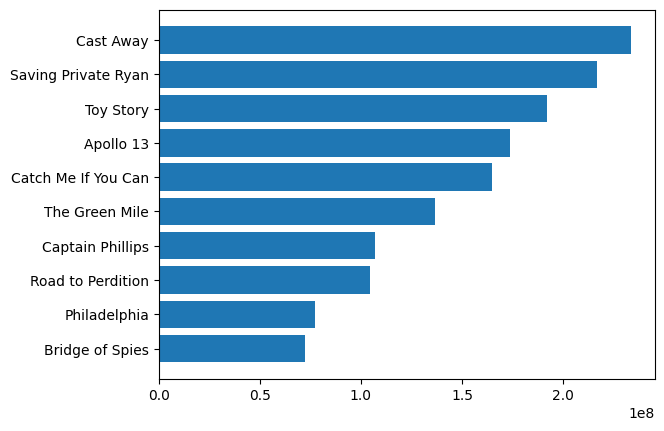

In [63]:
plt.barh(df_hanks["Series_Title"].head(10), df_hanks["Gross"].head(10))

In [64]:
df["Overview"]

0      Two imprisoned men bond over a number of years...
1      An organized crime dynasty's aging patriarch t...
2      When the menace known as the Joker wreaks havo...
3      The early life and career of Vito Corleone in ...
4      A jury holdout attempts to prevent a miscarria...
                             ...                        
995    A young New York socialite becomes interested ...
996    Sprawling epic covering the life of a Texas ca...
997    In Hawaii in 1941, a private is cruelly punish...
998    Several survivors of a torpedoed merchant ship...
999    A man in London tries to help a counter-espion...
Name: Overview, Length: 1000, dtype: object

In [66]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [67]:
text = " ".join([x for x in df.Overview])

In [68]:
len(text.split(" "))

25017

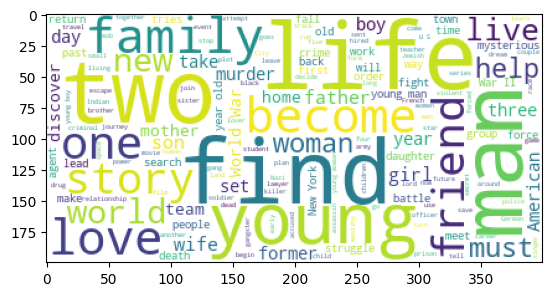

In [69]:
wc = WordCloud(background_color="white", max_words=200, #mask=mask,
               stopwords=STOPWORDS)#, contour_width=3, contour_color='steelblue')
wc.generate(text)
plt.imshow(wc)


In [70]:
im = np.array(Image.open('premium_photo-1710409625244-e9ed7e98f67b-removebg-preview.png'))


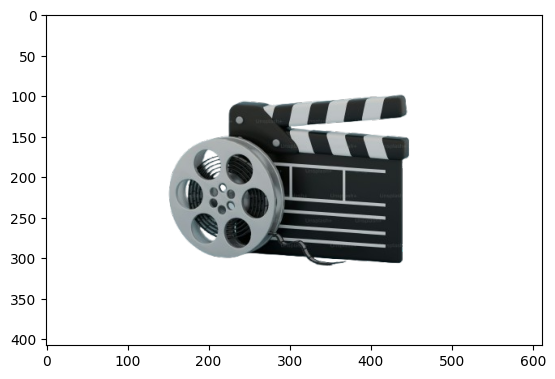

In [71]:
plt.imshow(im)

In [79]:
mask = np.where(im==0,255,0)

mask = mask[50:350,120:500,0]

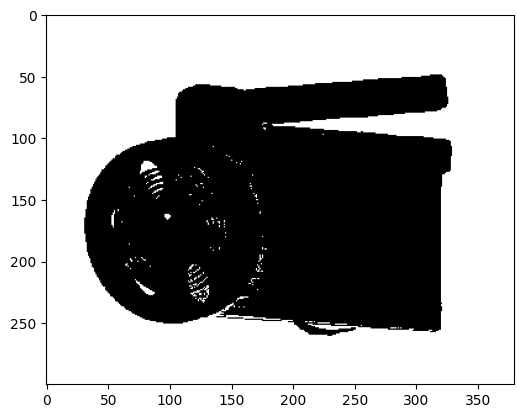

In [80]:
plt.imshow(mask, cmap="gray")

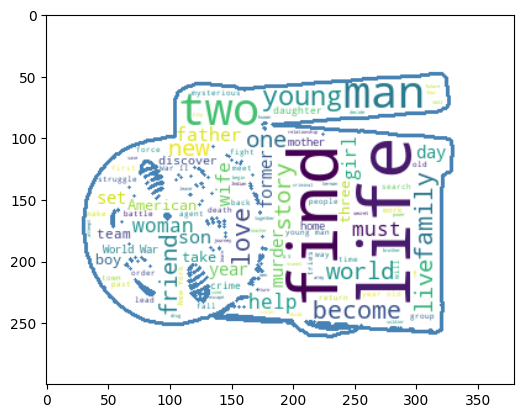

In [81]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=100, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')


In [83]:

import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator



parrot_color = np.array(Image.open("parrot-by-jose-mari-gimenez2.jpg"))

# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]


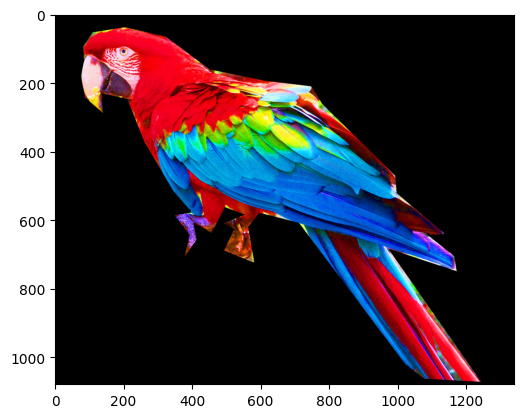

In [84]:
plt.imshow(parrot_color)

In [85]:
# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255


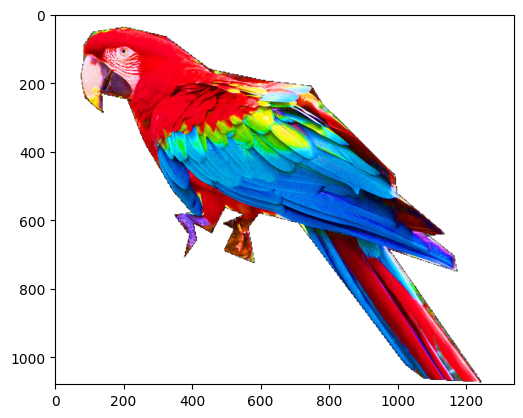

In [86]:
plt.imshow(parrot_mask)

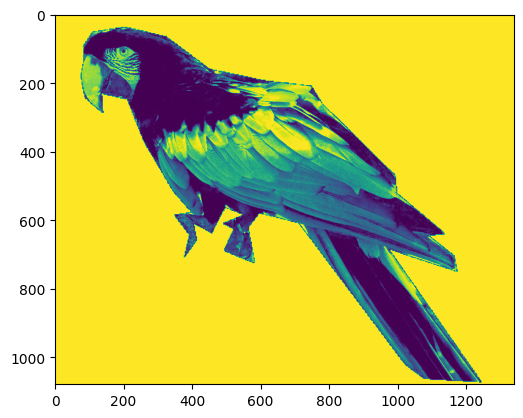

In [87]:
plt.imshow(parrot_mask[:,:,1])

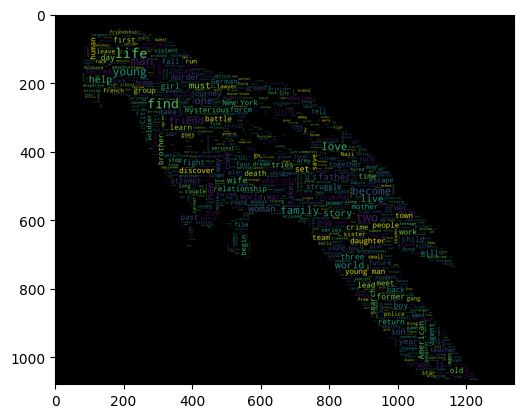

In [88]:
wc = WordCloud(max_words=1000, mask=parrot_mask[:,:,1], max_font_size=40, random_state=42)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

In [89]:
image_colors = ImageColorGenerator(parrot_color)

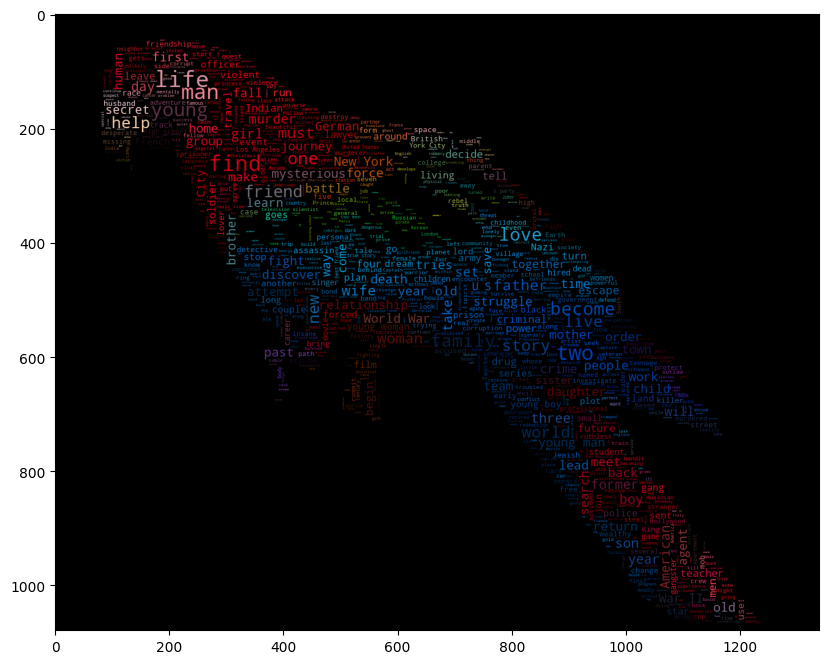

In [90]:
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10,8))
plt.imshow(wc)

In [ ]:
## 1) word clouds based on movie geners (subplot)
## 2) What are the top grossing geners on average?
## 3) come up with 2 more visualizations based on data that we didn't do before


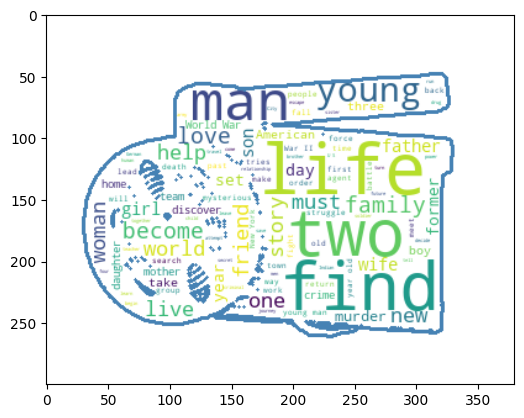

In [91]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

text = " ".join([x for x in df.Overview])

im = np.array(Image.open('premium_photo-1710409625244-e9ed7e98f67b-removebg-preview.png'))

mask = np.where(im==0,255,0)

mask = mask[50:350,120:500,0]

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=100, mask=mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
